<a href="https://colab.research.google.com/github/nana-hyun/AI_experience_lab/blob/main/4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [ ]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/team-a/0-data/adni-fs.csv")

TA = data.filter(regex="TA$")

data_extracted= pd.merge(left=data[['diagnosis']], right=TA, left_index=True, right_index=True)
data_extracted = data_extracted.drop(data_extracted[data_extracted['diagnosis']== 'MCI'].index)
data_extracted = data_extracted.dropna()
data_extracted = data_extracted.reset_index(drop=True)  #index reset
data_extracted

,diagnosis,ST13TA,ST14TA,ST15TA,ST23TA,ST24TA,ST25TA,ST26TA,ST31TA,ST32TA,...,ST113TA,ST114TA,ST115TA,ST116TA,ST117TA,ST118TA,ST119TA,ST121TA,ST129TA,ST130TA
0,AD,2.283,2.306,2.442,1.584,1.692,2.526,2.196,2.072,2.487,...,2.673,2.010,2.420,1.891,2.320,2.278,2.701,2.327,2.451,2.547
1,CN,2.225,2.466,2.418,1.560,2.846,2.780,2.445,2.333,2.687,...,2.899,2.159,2.564,2.033,2.250,2.397,3.708,2.162,2.668,3.022
2,AD,1.725,2.847,2.207,1.764,2.015,3.013,2.211,2.222,2.196,...,3.570,2.260,2.525,1.930,2.315,2.211,2.904,2.104,2.485,2.461
3,CN,2.164,2.963,2.368,1.743,3.489,2.463,2.807,2.207,2.940,...,2.556,2.208,2.487,2.047,2.155,2.314,3.056,2.213,2.789,2.955
4,AD,2.169,2.882,2.371,1.631,3.941,2.266,2.678,2.156,2.784,...,2.610,2.082,2.567,1.949,2.298,2.334,4.070,2.319,2.734,2.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,CN,2.372,3.080,2.332,1.753,3.160,2.254,2.642,2.231,2.613,...,2.950,1.866,2.283,1.978,2.421,1.994,3.131,1.606,2.695,2.546
737,CN,2.399,3.049,2.371,2.072,3.087,2.490,2.711,2.254,2.697,...,2.992,2.037,2.523,2.178,2.749,2.438,4.373,2.266,2.972,2.951
738,CN,2.323,2.910,2.494,1.930,3.850,2.770,2.674,2.378,2.776,...,2.414,2.045,2.512,2.173,2.761,2.394,3.919,2.373,2.980,2.920
739,CN,2.330,3.316,2.486,2.078,3.576,2.793,2.965,2.392,2.894,...,2.526,2.255,2.591,2.123,2.859,2.471,3.677,2.596,2.937,3.016


In [ ]:
# TA의 평균으로 구해보자

TA['avg'] = np.mean(TA, axis=1)
TA_avg = TA['avg']
data_ext= pd.merge(left=data[['diagnosis']], right=TA_avg, left_index=True, right_index=True)
data_ext = data_ext.drop(data_ext[data_ext['diagnosis']== 'MCI'].index)
data_ext = data_ext.dropna()
data_ext = data_ext.reset_index(drop=True)  #index reset
data_ext

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,diagnosis,avg
0,AD,2.189103
1,CN,2.356206
2,AD,2.313162
3,CN,2.375765
4,AD,2.349544
...,...,...
736,CN,2.334441
737,CN,2.544221
738,CN,2.549294
739,CN,2.615397


In [ ]:

df_shuffled = data_ext.iloc[np.random.permutation(len(data_ext))].reset_index(drop=True)
df_shuffled1 = data_extracted.iloc[np.random.permutation(len(data_extracted))].reset_index(drop=True)


In [ ]:
# Prepare the data


X1= df_shuffled1.filter(regex="TA$").values
#X = data_extracted['ST13TA'].values
X = df_shuffled['avg'].values
y = df_shuffled['diagnosis'].values

y[y == 'CN']= 1
y[y == 'AD'] = 2

Text(0, 0.5, 'AD/CN (2/1)')

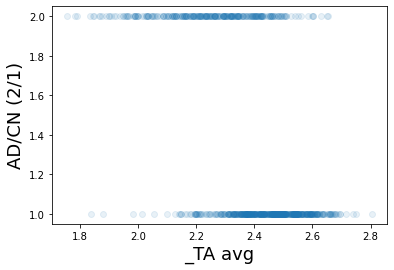

In [ ]:
plt.scatter(X,y,alpha=0.1)

plt.xlabel("_TA avg", fontsize=18)
plt.ylabel("AD/CN (2/1)", rotation=90, fontsize=18)

Text(0, 0.5, 'AD/CN (2/1)')

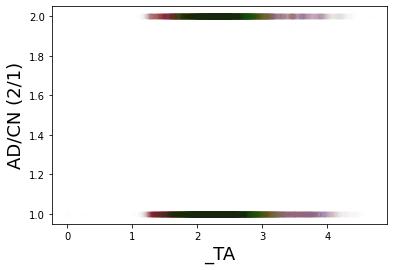

In [ ]:
# Visualize the data

for i in range(68):
    T = X1[:,i]
    plt.scatter(T,y,alpha = 0.002)
#plt.plot(X1[:,67],y,'o',alpha = 0.1,color='r') 
plt.xlabel("_TA", fontsize=18)
plt.ylabel("AD/CN (2/1)", rotation=90, fontsize=18)

[2.245 2.907 2.288 1.443 3.207 2.801 2.72  2.192 2.702 2.94  1.712 2.463
 1.761 2.489 2.728 1.63  2.591 2.461 2.816 2.445 1.383 1.589 2.418 1.948
 2.131 2.929 2.324 2.415 1.793 2.561 2.228 3.634 1.93  2.6   2.899 2.319
 1.477 3.882 2.883 3.061 2.377 3.007 2.743 1.827 2.63  1.792 2.431 2.996
 1.995 2.527 2.314 2.795 2.536 1.395 1.513 2.507 1.888 2.109 2.776 2.396
 2.558 1.884 2.543 2.29  3.628 1.639 2.85  2.971]


Text(0, 0.5, 'AD/CN (2/1)')

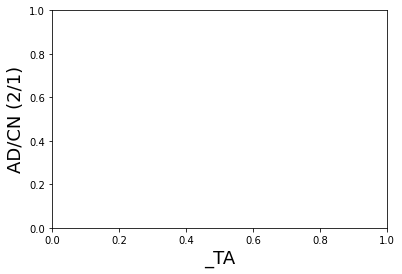

In [ ]:
print(X1[:,0])
#plt.scatter(X1[0,],y,alpha = 0.1,colormap='Spectural') 
plt.xlabel("_TA", fontsize=18)
plt.ylabel("AD/CN (2/1)", rotation=90, fontsize=18)

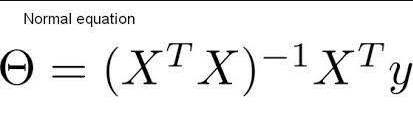

# Linear regression

## average of TA

In [ ]:
X_b = np.c_[np.ones((741,1)),X] #np.c_ : 배열붙이기, np.ones : 배열 생성 (1로 채움)
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #dot() : 행렬 곱셈

[[1.         2.08608824]
 [1.         2.29576471]
 [1.         2.38488235]
 ...
 [1.         2.47602941]
 [1.         2.23383824]
 [1.         2.08661765]]


In [ ]:
print(theta_best)

[4.840658662407982 -1.4583391850154612]


In [ ]:
X_new = np.array([[1.5], [3]]) # 2차원 열 벡터
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)

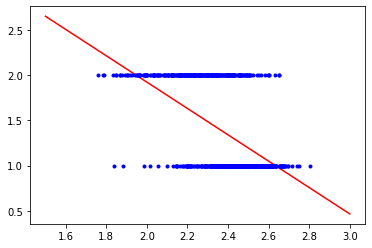

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Select a linear model
lin_model = sklearn.linear_model.LinearRegression()

# Train the model
lin_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lin_model.intercept_, lin_model.coef_

(4.807866729909373, array([-1.44388096]))

In [ ]:
lin_model.predict(X_new)

array([2.64204529, 0.47622384])

## all TA

In [ ]:
X1_b = np.c_[np.ones((741,1)),X1] #np.c_ : 배열붙이기, np.ones : 배열 생성 (1로 채움)
print(X1_b)
'''
for i in X1_b:
  i = np.transpose(i)
  theta_best += np.linalg.inv(i.T.dot(i)).dot(i.T).dot(y) #dot() : 행렬 곱셈
'''
theta_best = np.linalg.inv(X1_b.T.dot(X1_b)).dot(X1_b.T).dot(y) #dot() : 행렬 곱셈
#theta_best /= 68

theta_best


[[1.    2.245 2.907 ... 1.639 2.85  2.971]
 [1.    2.18  3.058 ... 2.375 2.946 2.916]
 [1.    2.415 2.158 ... 2.401 2.797 2.666]
 ...
 [1.    2.307 3.17  ... 2.361 2.863 2.894]
 [1.    2.555 2.644 ... 2.392 3.131 2.94 ]
 [1.    2.29  2.009 ... 1.751 2.639 2.761]]


array([1.204771332414586, -0.054565953929567694, -0.05228948278678888,
       -0.34561395005163953, 0.04488803609158409, 0.022889237637306874,
       0.04994042032296847, 0.15032311749987035, 0.4197692509118078,
       -0.11693106477470348, 0.06029006412329398, -0.31159877229376953,
       -0.08773397253736623, 0.14416121205322252, -0.14111946928763838,
       0.019978382866660212, 0.08407981015477986, 0.1355723939842162,
       0.04811542394086657, 0.08423672346971585, -0.04095524410945968,
       0.11930785111523473, -0.22009659463480985, -0.007560012073245085,
       0.3679702740377784, -0.12472604355641782, -0.022103851105669613,
       -0.31921831277266, 0.17162482777440274, 0.11840092665392496,
       0.3981500399092561, -0.23736077394602442, -0.0047504824605069,
       -0.2004115731226449, 0.04558920797975235, 0.017057449523979227,
       0.16785648722182184, -0.038888828878558546, 0.040983536527117045,
       0.03944930179883667, 0.089999193883316, -0.4847986706026014,
       -

[-0.02671727153643058 7.228864862050999]
[-0.07900675432321946 9.586118044093382]
[-0.424620704374859 11.650046758870914]
[-0.3797326682832749 14.10447745979167]
[-0.356843430645968 16.53690936225815]
[-0.30690301032299955 18.99639244741029]
[-0.1565798928231292 21.55625822973933]
[0.2631893580886786 24.38557014548031]
[0.1462582933139751 26.67818174553478]
[0.20654835743726907 29.148014474487244]
[-0.10505041485650046 31.245958367022645]
[-0.1927843873938667 33.56776705931445]
[-0.04862317534064417 36.12147093619684]
[-0.18974264462828255 38.38989413173837]
[-0.16976426176162235 40.8194151794342]
[-0.08568445160684249 43.31303765441815]
[0.049887942377373706 45.85815271323154]
[0.09800336631824028 48.31581080200158]
[0.18224008978795614 50.80959019030047]
[0.14128484567849647 53.17817761102018]
[0.2605926967937312 55.70702812696459]
[0.040496102158921354 57.89647419715895]
[0.03293609008567627 60.29845684991488]
[0.40090636412345465 63.075969788781826]
[0.27618032056703684 65.36078641

<function matplotlib.pyplot.show>

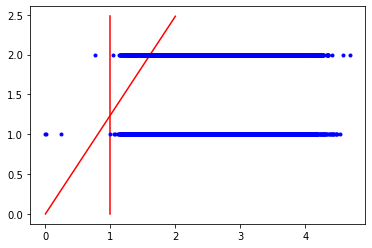

In [ ]:
X1_new = np.array([[0], [2]]) # 2차원 열 벡터
X1_new_b = np.c_[np.ones((2,1)), X1_new] # 모든 샘플에 x0 = 1을 추가

for i in theta_best[1:]:
  arr = np.array([i, theta_best[0]])
  y_predict += X1_new_b.dot(arr)
  print(y_predict)

y_predict /= 68
plt.plot(X1_new_b, y_predict, "r-")
plt.plot(X1, y, "b.")
plt.show

In [ ]:
X1_train, X1_test = train_test_split(X1, test_size=0.2, shuffle=True, random_state=42)

# Select a linear model
lin_model1 = sklearn.linear_model.LinearRegression()

# Train the model
lin_model1.fit(X1_train,y_train)

LinearRegression()

In [ ]:
lin_model1.intercept_, lin_model1.coef_

(1.3400990582817625,
 array([-2.70993277e-03, -4.87572631e-02, -1.72427469e-01, -6.98247874e-02,
         5.13943386e-02,  2.83706416e-02,  1.04233925e-01,  4.58150620e-01,
        -1.68344964e-01,  7.58071109e-03, -2.05740212e-01, -2.42735918e-02,
         3.07403921e-01, -2.24675631e-01, -1.50361477e-02,  4.21411015e-02,
         1.30811305e-01, -8.67982434e-02,  7.30063377e-02,  1.26345496e-02,
         1.11958855e-01, -3.80381974e-01,  3.72097913e-02,  4.29422535e-01,
         3.46758407e-02,  4.98932049e-02, -2.45009120e-01,  2.05198762e-01,
         1.80117844e-01,  3.23874111e-01, -3.55874047e-01,  4.92591663e-03,
        -1.42730876e-01, -4.06987340e-02, -2.22340452e-02,  1.61209331e-01,
        -9.61522760e-02,  2.71211773e-02,  8.96834089e-02,  7.98216362e-02,
        -3.59444913e-01, -3.66330403e-01,  1.33664082e-02,  2.77835235e-01,
         2.43668395e-01, -3.58868622e-01, -3.94193759e-02, -8.06844776e-05,
         7.06788830e-02, -2.09206785e-01,  6.20407421e-02, -1.07035

# Gradient Descent Algorithm

## SGD

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3,random_state=42, penalty = None, eta0 = 0.1)
sgd_reg.fit(X1_train, y_train)

sgd_reg.intercept_, sgd_reg.coef_

(array([-7.73835166e+09]),
 array([ 4.75885278e+10,  2.26849430e+10, -5.05938834e+10, -3.54300454e+10,
         8.32064248e+10, -1.22803898e+11, -5.43238857e+10,  3.64705166e+09,
         8.98821848e+10,  1.08358320e+11,  2.56303516e+10,  2.57494505e+10,
         6.44458850e+10, -1.28126514e+11, -1.53139748e+11, -1.59278401e+10,
        -6.11031192e+10,  1.12515764e+11,  4.57144267e+10,  8.08334462e+10,
         1.85525402e+09,  7.27231819e+10, -4.06785299e+10,  3.47611915e+10,
        -6.85452451e+10, -1.50116966e+11, -7.91898196e+10,  1.58769639e+09,
        -4.30890194e+10,  1.39224775e+11, -1.80858818e+11,  4.06085443e+10,
         5.70997060e+10, -2.91984260e+10, -5.16777284e+10, -5.13182076e+10,
        -8.83344124e+10,  2.59216557e+10,  1.31039277e+10,  3.32283697e+10,
        -4.25848826e+10, -6.49433579e+10,  9.81407525e+10, -1.50095619e+11,
        -1.33778864e+11,  1.65438730e+11,  2.38523446e+10, -1.03985395e+10,
        -2.41137388e+10,  2.56849192e+10,  1.80846977e+11,  3

# Polynomial Regression